# **Activity 7.01**
# **Building a Convolutional Neural Network with More ANN Layers**  

In thie activity for this Chapter, you’ll be putting all that you’ve learned to use as you build your own classifier with the CIFAR100. The CIFAR100 is 

Here's some code to get you started. Remember you can go back to previous exercises for guidance if needed. Good luck!


**Import Tensorflow**

In [1]:
import tensorflow as tf

**3. Import additional libraries.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, Activation, Rescaling
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**4. Load the CIFAR100 dataset.**

In [5]:
(c100_train_dataset, c100_test_dataset), dataset_info = tfds.load(\
                         'cifar100'
                         , split = ['train', 'test']
                         , data_dir = 'content/Cifar100/'
                         , shuffle_files = True
                         , as_supervised = True
                         , with_info = True)
assert isinstance(c100_train_dataset, tf.data.Dataset)

image_shape = dataset_info.features["image"].shape
print(f'Shape of Images in the Dataset: \t{image_shape}')
num_classes = dataset_info.features["label"].num_classes
print(f'Number of Classes in the Dataset: \t{num_classes}')

names_of_classes = dataset_info.features["label"].names
print(f'Names of Classes in the Dataset: \t{names_of_classes}\n')

print(f'Total examples in Train Dataset: \
      \t{len(c100_train_dataset)}')
print(f'Total examples in Test Dataset: \
      \t{len(c100_test_dataset)}')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

2021-11-24 13:15:57.819336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shuffling cifar100-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar100-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to content/Cifar100/cifar100/3.0.2. Subsequent calls will reuse this data.
Shape of Images in the Dataset: 	(32, 32, 3)
Number of Classes in the Dataset: 	100
Names of Classes in the Dataset: 	['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk'

In [10]:
normalization_layer = Rescaling(1./255)

c100_train_dataset = c100_train_dataset.map\
                     (lambda x, y: (normalization_layer(x), y), \
                      num_parallel_calls = \
                      tf.data.experimental.AUTOTUNE)
c100_train_dataset = c100_train_dataset.cache()
c100_train_dataset = c100_train_dataset.shuffle\
                     (len(c100_train_dataset))
c100_train_dataset = c100_train_dataset.batch(32)
c100_train_dataset = c100_train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

c100_test_dataset = c100_test_dataset.map\
                    (lambda x, y: (normalization_layer(x), y), \
                     num_parallel_calls = \
                     tf.data.experimental.AUTOTUNE)
c100_test_dataset = c100_test_dataset.cache()
c100_test_dataset = c100_test_dataset.batch(128)
c100_test_dataset = \
c100_test_dataset.prefetch(tf.data.experimental.AUTOTUNE)


**Build the model.**

In [11]:
input_layer = Input(shape=image_shape)
x = Conv2D(filters = 32, kernel_size = \
           (3, 3), strides=2)(input_layer)
x = Activation('relu')(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides=2)(x)
x = Activation('relu')(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides=2)(x)
x = Activation('relu')(x)

x = Flatten()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(units = 1024)(x)
x = Activation('relu')(x)
x = Dropout(rate = 0.2)(x)

x = Dense(units = num_classes)(x)
output = Activation('softmax')(x)

c100_classification_model = Model(input_layer, output)


**Compile the model.**

In [13]:
c100_classification_model.compile(\
optimizer='adam', loss='sparse_categorical_crossentropy', \
metrics = ['accuracy'], loss_weights = None, \
weighted_metrics = None, run_eagerly = None, \
steps_per_execution = None
)
history = c100_classification_model.fit(c100_train_dataset, validation_data=c100_test_dataset, epochs=15)

Epoch 1/15


2021-11-24 13:20:48.843205: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1563/1563 [==============================] - 27s 16ms/step - loss: 3.8222 - accuracy: 0.1156 - val_loss: 3.3572 - val_accuracy: 0.2025
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 3.2672 - accuracy: 0.2104 - val_loss: 3.0061 - val_accuracy: 0.2647
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 3.0061 - accuracy: 0.2555 - val_loss: 2.8690 - val_accuracy: 0.2938
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 2.8389 - accuracy: 0.2887 - val_loss: 2.7564 - val_accuracy: 0.3193
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - loss: 2.6978 - accuracy: 0.3169 - val_loss: 2.6679 - val_accuracy: 0.3395
Epoch 6/15
1563/1563 [==============================] - 24s 16ms/step - loss: 2.5823 - accuracy: 0.3393 - val_loss: 2.5978 - val_accuracy: 0.3492
Epoch 7/15
1563/1563 [==============================] - 27s 17ms/step - loss: 2.4750 - accuracy: 0.3613 - val_loss: 2.5678 - val_accura

**Plot loss.**

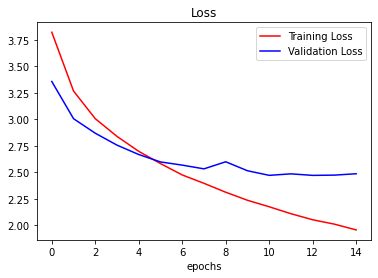

<Figure size 432x288 with 0 Axes>

In [14]:
def plot_trend_by_epoch(tr_values, val_values, title):
    epoch_number = range(len(tr_values))
    plt.plot(epoch_number, tr_values, 'r')
    plt.plot(epoch_number, val_values, 'b')
    plt.title(title)
    plt.xlabel('epochs')
    plt.legend(['Training '+title, 'Validation '+title])
    plt.figure()

hist_dict = history.history

tr_loss, val_loss = hist_dict['loss'], \
                    hist_dict['val_loss']
plot_trend_by_epoch(tr_loss, val_loss, "Loss")

**Plot accuracy**

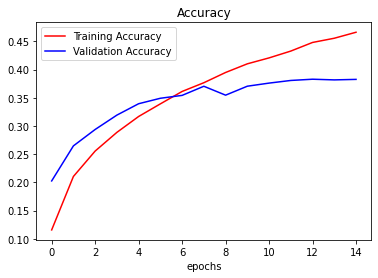

<Figure size 432x288 with 0 Axes>

In [15]:
tr_accuracy, val_accuracy = hist_dict['accuracy'], \
                            hist_dict['val_accuracy']
plot_trend_by_epoch(tr_accuracy, val_accuracy, "Accuracy")


**Check random incorrectly classified image.**

True label: pickup_truck
Predicted label: streetcar


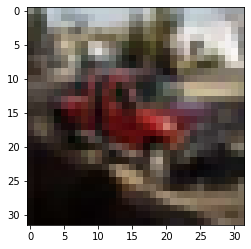

In [16]:
test_labels = []
test_images = []
for image, label in tfds.as_numpy(c100_test_dataset.unbatch()):
    test_images.append(image)
    test_labels.append(label)
test_labels = np.array(test_labels)

predictions = c100_classification_model.predict\
              (c100_test_dataset).argmax(axis=1)

incorrect_predictions = np.where(predictions != test_labels)[0]
index = np.random.choice(incorrect_predictions)

plt.imshow(test_images[index])
print(f'True label: {names_of_classes[test_labels[index]]}')
print(f'Predicted label: {names_of_classes[predictions[index]]}')
